In [1]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.net.usercache.abstract_usercache as enua
import numpy as np

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

DEBUG:root:['', '/Users/shankari/OSS/anaconda/lib/python2.7/site-packages/pygmaps-0.1.1-py2.7.egg', '/Users/shankari/e-mission/e-mission-server', '/Users/shankari/e-mission/data-collection-eval/analysis_spring_2016', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python27.zip', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/plat-darwin', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/plat-mac', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/lib-tk', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/lib-old', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/lib-dynload', '/Users/shankari/OSS/anaconda/lib/python2.7/site-packages/runipy-0.1.0-py2.7.egg', '/Users/shankari/OSS/anaconda/lib/python2.7/site-packages', '/Users/shankari/OSS/anaconda/lib

In [2]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[]

In [3]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

In [4]:
ranges_df = pd.read_csv("../results_spring_2016/ranges.csv")

In [5]:
ranges_df

start_ts                    start_fmt_time        end_ts  \
0   1.459279e+09  2016-03-29T12:17:14.700000-07:00  1.459288e+09   
1   1.459288e+09  2016-03-29T14:46:54.916000-07:00  1.459301e+09   
2   1.459301e+09  2016-03-29T18:30:54.916000-07:00  1.459302e+09   
3   1.459302e+09  2016-03-29T18:42:30.685000-07:00  1.459311e+09   
4   1.459311e+09  2016-03-29T21:06:30.275000-07:00  1.459343e+09   
5   1.459343e+09  2016-03-30T06:00:09.654643-07:00  1.459354e+09   
6   1.459354e+09  2016-03-30T09:00:13.859000-07:00  1.459372e+09   
7   1.459372e+09  2016-03-30T14:01:58.965395-07:00  1.459372e+09   
8   1.459372e+09  2016-03-30T14:13:55.019000-07:00  1.459373e+09   
9   1.459373e+09  2016-03-30T14:24:42.464000-07:00  1.459376e+09   
10  1.459376e+09  2016-03-30T15:21:27.670000-07:00  1.459377e+09   
11  1.459377e+09  2016-03-30T15:33:41.654000-07:00  1.459380e+09   
12  1.459380e+09  2016-03-30T16:19:58.943000-07:00  1.459381e+09   
13  1.459381e+09  2016-03-30T16:37:41.978000-07:00  1.459386e+09   
14  1.459386e+09  2016-03-30T17:57:23.050000-07:00  1.459387e+09   
15  1.459387e+09  2016-03-30T18:23:40.680000-07:00  1.459403e+09   
16  1.459403e+09  2016-03-30T22:48:17.862000-07:00  1.459404e+09   
17  1.459404e+09  2016-03-30T22:57:33.392000-07:00  1.459411e+09   
18  1.459411e+09  2016-03-31T01:00:10.330742-07:00  1.459440e+09   
19  1.459440e+09  2016-03-31T09:00:25.839312-07:00  1.459448e+09   
20  1.459448e+09  2016-03-31T11:14:15.125000-07:00  1.459456e+09   
21  1.459456e+09  2016-03-31T13:32:48.010000-07:00  1.459471e+09   
22  1.459471e+09  2016-03-31T17:44:00.045000-07:00  1.459479e+09   
23  1.459479e+09  2016-03-31T19:57:44.073000-07:00  1.459483e+09   
24  1.459483e+09  2016-03-31T21:00:37.643000-07:00  1.459487e+09   
25  1.459487e+09  2016-03-31T22:00:37.643000-07:00  1.459530e+09   
26  1.459530e+09  2016-04-01T10:05:28.890454-07:00  1.459535e+09   
27  1.459535e+09  2016-04-01T11:19:33.655000-07:00  1.459543e+09   
28  1.459542e+09  2016-04-01T13:14:35.602000-07:00  1.459558e+09   
29  1.459558e+09  2016-04-01T17:48:05.806000-07:00  1.459565e+09   
30  1.459565e+09  2016-04-01T19:49:57.554000-07:00  1.459591e+09   
31  1.459591e+09  2016-04-02T02:57:37.753000-07:00  1.459609e+09   
32  1.459609e+09  2016-04-02T07:57:37.753000-07:00  1.459644e+09   
33  1.459644e+09  2016-04-02T17:47:43.791000-07:00  1.459721e+09   
34  1.459721e+09  2016-04-03T15:00:35.358757-07:00  1.459729e+09   
35  1.459729e+09  2016-04-03T17:18:29.931541-07:00  1.459789e+09   
36  1.459789e+09  2016-04-04T10:02:13.321972-07:00  1.459800e+09   
37  1.459800e+09  2016-04-04T12:59:12.753874-07:00  1.459833e+09   
38  1.459833e+09        2016-04-04T22:05:02.444129  1.459866e+09   
39  1.459866e+09  2016-04-05T07:20:38.395970-07:00  1.459868e+09   
40  1.459868e+09  2016-04-05T07:50:37.141000-07:00  1.459875e+09   
41  1.459875e+09  2016-04-05T09:48:39.276000-07:00  1.459900e+09   
42  1.459900e+09  2016-04-05T16:50:31.349801-07:00  1.459901e+09   

                        end_fmt_time             state  \
0   2016-03-29T14:46:54.916000-07:00            moving   
1   2016-03-29T18:30:30.685000-07:00         loitering   
2   2016-03-29T18:42:30.685000-07:00            moving   
3   2016-03-29T21:06:30.275000-07:00            moving   
4   2016-03-30T06:00:09.654643-07:00        stationary   
5   2016-03-30T09:00:13.859000-07:00  charging-or-full   
6   2016-03-30T14:01:58.965395-07:00  charging-or-full   
7   2016-03-30T14:13:55.019000-07:00         loitering   
8   2016-03-30T14:24:42.464000-07:00            moving   
9   2016-03-30T15:21:27.670000-07:00         loitering   
10  2016-03-30T15:33:41.654000-07:00            moving   
11  2016-03-30T16:19:58.943000-07:00         loitering   
12  2016-03-30T16:37:41.978000-07:00            moving   
13  2016-03-30T17:57:23.050000-07:00         loitering   
14  2016-03-30T18:23:40.680000-07:00            moving   
15  2016-03-30T22:48:17.862000-07:00         loitering   
16  2016-03-30T22:57:33.39200

In [6]:
regime_grouped_ranges_df = ranges_df.groupby(['state', 'android_regime', 'ios_regime'])

In [7]:
invalid_df = pd.read_csv("../results_spring_2016/invalid.csv")

In [8]:
invalid_df

platform                 key      start_ts  \
0  android  background/battery  1.459354e+09   

                     start_fmt_time        end_ts  \
0  2016-03-30T09:00:08.640000-07:00  1.459436e+09   

                       end_fmt_time  
0  2016-03-31T07:57:22.005000-07:00

In [9]:
caltrain_df = pd.read_csv("../results_spring_2016/caltrain_trips.csv")

In [10]:
caltrain_df

start_ts                    start_fmt_time        end_ts  \
0  1.459307e+09  2016-03-29T19:57:30.275000-07:00  1.459309e+09   
1  1.459449e+09  2016-03-31T11:31:30.275000-07:00  1.459452e+09   
2  1.459476e+09  2016-03-31T18:57:30.275000-07:00  1.459478e+09   

                       end_fmt_time  
0  2016-03-29T20:43:30.275000-07:00  
1  2016-03-31T12:17:30.275000-07:00  
2  2016-03-31T19:38:30.275000-07:00

In [12]:
def get_points_from_ts_for_range(ts, start_ts, end_ts):
    return ts.get_data_df("background/location", enua.UserCache.TimeQuery('write_ts', start_ts, end_ts))

In [13]:
def get_points_for_range(ts, range_df):
    points_range_df = map(lambda row: get_points_from_ts_for_range(ts, row['start_ts'], row['end_ts']), range_df.to_dict('records'))
    return points_range_df

In [14]:
def get_points_for_group(ts_list, range_df):
    return map(lambda ts: get_points_for_range(ts, range_df), ts_list)

In [16]:
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [17]:
import scipy.interpolate as spi
import numpy as np

In [18]:
pd.options.display.float_format = '{:.3f}'.format

In [19]:
def get_interp_df(raw_df):
    start_ts = raw_df.ts.iloc[0]
    end_ts = raw_df.ts.iloc[-1]
    latf = spi.interp1d(x=raw_df.ts, y=raw_df.latitude, bounds_error=False)
    lngf = spi.interp1d(x=raw_df.ts, y=raw_df.longitude, bounds_error=False)
    ts_new = np.arange(int(start_ts), int(end_ts), 1)
    fmt_time_new = map(lambda ts: pydt.datetime.fromtimestamp(ts).isoformat(), ts_new)
    interp_df = pd.DataFrame({"ts": ts_new, "fmt_time": fmt_time_new,
                            "latitude": latf(ts_new), "longitude": lngf(ts_new)}, index=ts_new)
    interp_df = interp_df.dropna()
    return interp_df

In [20]:
import emission.analysis.point_features as pf
import attrdict as ad

In [21]:
def calDistance(row):
    return pf.calDistance(ad.AttrDict({"latitude": row['latitude_android'], "longitude": row['longitude_android']}),
                          ad.AttrDict({"latitude": row['latitude_ios'], "longitude": row['longitude_ios']}))

In [43]:
def get_ground_truth(android_ts, ios_ts, start_ts, end_ts):
    android_df = get_interp_df(android_ts.get_data_df("background/location", enua.UserCache.TimeQuery("write_ts", start_ts, end_ts)))
    ios_df = get_interp_df(ios_ts.get_data_df("background/location", enua.UserCache.TimeQuery("write_ts", start_ts, end_ts)))
    joined_df = android_df.join(ios_df, how='inner', lsuffix="_android", rsuffix="_ios")
    # joined_df.drop(['fmt_time_ios', 'ts_ios'], axis=1, inplace=True)
    # joined_df.rename(columns={"fmt_time_android": "fmt_time", "ts_android": "ts"}, inplace=True)
    joined_df['same_point_distances'] = joined_df.apply(calDistance, axis=1)
    filtered_df = joined_df[joined_df.same_point_distances < 40]
    combined_df = pd.DataFrame({"ts": filtered_df.ts_android, "fmt_time": filtered_df.fmt_time_android,
                            "latitude": (filtered_df.latitude_android + filtered_df.latitude_ios)/2,
                            "longitude": (filtered_df.longitude_android + filtered_df.longitude_ios)/2,
                            "same_point_distances": filtered_df.same_point_distances}, index=np.array(filtered_df.ts_android))
    pct_retained = float(len(combined_df) * 100) / (int(end_ts) - int(start_ts))
    return pct_retained, combined_df

In [24]:
caltrain_df.iloc[0]

start_ts                            1459306650.275
start_fmt_time    2016-03-29T19:57:30.275000-07:00
end_ts                              1459309410.275
end_fmt_time      2016-03-29T20:43:30.275000-07:00
Name: 0, dtype: object

In [44]:
(pct_retained_30_in, ground_truth_30_in) = get_ground_truth(android_ts[0], iphone_ts[0], caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 2751 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1981 results


In [59]:
(pct_retained_compare_30_in_1, compare_truth_30_in_1) = get_ground_truth(android_ts[1], iphone_ts[1], caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2724 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 2045 results


In [61]:
(pct_retained_compare_30_in_2, compare_truth_30_in_2) = get_ground_truth(android_ts[2], iphone_ts[2], caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 2759 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 2089 results


In [62]:
(pct_retained_compare_30_in_3, compare_truth_30_in_3) = get_ground_truth(android_ts[3], iphone_ts[3], caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 2760 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 2087 results


In [63]:
print pct_retained_30_in, pct_retained_compare_30_in_1, pct_retained_compare_30_in_2, pct_retained_compare_30_in_3

90.8333333333 82.3913043478 88.6594202899 97.1739130435


In [64]:
def calDistanceGround(row):
    return pf.calDistance(ad.AttrDict({"latitude": row['latitude_ground'], "longitude": row['longitude_ground']}),
                          ad.AttrDict({"latitude": row['latitude_compare'], "longitude": row['longitude_compare']}))

In [65]:
def compare_trajectories(ground_truth_df, compare_df):
    joined_df = ground_truth_df.join(compare_df, how='inner', lsuffix="_ground", rsuffix="_compare")
    joined_df['compare_distance'] = joined_df.apply(calDistanceGround, axis=1)
    return joined_df

In [75]:
compare_ground_truth_30_in_1 = compare_trajectories(ground_truth_30_in, compare_truth_30_in_1)
compare_ground_truth_30_in_1.head()

fmt_time_ground  latitude_ground  longitude_ground  \
1459306652  2016-03-29T19:57:32           37.600          -122.387   
1459306653  2016-03-29T19:57:33           37.600          -122.387   
1459306654  2016-03-29T19:57:34           37.600          -122.387   
1459306655  2016-03-29T19:57:35           37.600          -122.387   
1459306656  2016-03-29T19:57:36           37.600          -122.387   

            same_point_distances_ground   ts_ground     fmt_time_compare  \
1459306652                       28.077  1459306652  2016-03-29T19:57:32   
1459306653                       27.888  1459306653  2016-03-29T19:57:33   
1459306654                       27.607  1459306654  2016-03-29T19:57:34   
1459306655                       27.247  1459306655  2016-03-29T19:57:35   
1459306656                       26.583  1459306656  2016-03-29T19:57:36   

            latitude_compare  longitude_compare  same_point_distances_compare  \
1459306652            37.600           -122.387                        20.468   
1459306653            37.600           -122.387                        22.580   
1459306654            37.600           -122.387                        24.450   
1459306655            37.600           -122.387                        26.197   
1459306656            37.600           -122.387                        27.760   

            ts_compare  compare_distance  
1459306652  1459306652             7.372  
1459306653  1459306653             6.963  
1459306654  1459306654             6.676  
1459306655  1459306655             5.939  
1459306656  1459306656             5.524

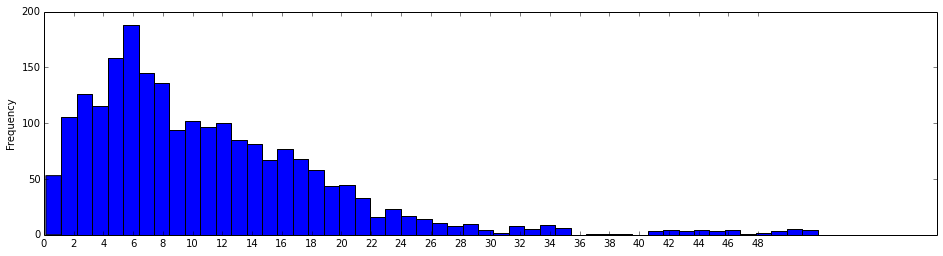

In [67]:
ax = compare_ground_truth_30_in_1.compare_distance.plot(kind='hist', bins=50, figsize=(16,4))
ticks_list = ax.set_xticks(np.arange(0,50,2))

In [68]:
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [69]:
reload(gfc)

<module 'emission.analysis.plotting.geojson.geojson_feature_converter' from '/Users/shankari/e-mission/e-mission-server/emission/analysis/plotting/geojson/geojson_feature_converter.pyc'>

In [71]:
ipy.inline_maps([lo.get_maps_for_geojson_unsectioned([gfc.get_feature_list_from_df(compare_ground_truth_30_in_1.head(n=100), 
                    ts="ts_ground", latitude="latitude_ground", longitude="longitude_ground", fmt_time="fmt_time_ground")]) +
lo.get_maps_for_geojson_unsectioned([gfc.get_feature_list_from_df(compare_ground_truth_30_in_1.head(n=100),
                    ts="ts_compare", latitude="latitude_compare", longitude="longitude_compare", fmt_time="fmt_time_compare")])])

DEBUG:root:Getting midpoint of (-122.3871006567839, 37.60012395721525) and (-122.34315527333683, 37.57939109559001)


Found 100 points
Found 100 points

DEBUG:root:Getting midpoint of (-122.38709320144883, 37.600189987148006) and (-122.34342187812697, 37.57946897327339)


In [76]:
compare_ground_truth_30_in_2 = compare_trajectories(ground_truth_30_in, compare_truth_30_in_2)
compare_ground_truth_30_in_3 = compare_trajectories(ground_truth_30_in, compare_truth_30_in_3)

In [77]:
pct_retained_1 = float(len(compare_ground_truth_30_in_1) * 100) / (int(caltrain_df.iloc[0].end_ts) - int(caltrain_df.iloc[0].start_ts))
pct_retained_2 = float(len(compare_ground_truth_30_in_2) * 100) / (int(caltrain_df.iloc[0].end_ts) - int(caltrain_df.iloc[0].start_ts))
pct_retained_3 = float(len(compare_ground_truth_30_in_3) * 100) / (int(caltrain_df.iloc[0].end_ts) - int(caltrain_df.iloc[0].start_ts))

print pct_retained_1, pct_retained_2, pct_retained_3

77.8985507246 81.0507246377 89.0579710145


In [79]:
compare_ground_truth_30_in_1.compare_distance.describe()

count   2150.000
mean      11.008
std        8.323
min        0.140
25%        5.226
50%        8.962
75%       15.147
max       51.994
Name: compare_distance, dtype: float64

In [80]:
compare_ground_truth_30_in_2.compare_distance.describe()

count   2237.000
mean      10.583
std        6.410
min        0.221
25%        5.805
50%        9.360
75%       14.332
max       51.670
Name: compare_distance, dtype: float64

In [82]:
compare_ground_truth_30_in_3.compare_distance.describe()

count   2458.000
mean       9.014
std        5.535
min        0.170
25%        5.017
50%        8.059
75%       12.078
max       50.102
Name: compare_distance, dtype: float64

In [84]:
compare_raw_trajectory_ios_1 = compare_trajectories(ground_truth_30_in,
                                    get_interp_df(iphone_ts[1].get_data_df("background/location", 
                                            enua.UserCache.TimeQuery("write_ts", caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts))))

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 2045 results


In [86]:
compare_raw_trajectory_ios_1.compare_distance.describe()

count   2507.000
mean      14.061
std       14.452
min        0.036
25%        5.930
50%       10.407
75%       17.397
max      144.995
Name: compare_distance, dtype: float64

In [87]:
compare_raw_trajectory_android_1 = compare_trajectories(ground_truth_30_in,
                                    get_interp_df(android_ts[1].get_data_df("background/location", 
                                            enua.UserCache.TimeQuery("write_ts", caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts))))

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2724 results


In [88]:
compare_raw_trajectory_android_1.compare_distance.describe()

count    2507.000
mean      199.270
std      2221.579
min         0.317
25%         9.970
50%        18.292
75%        26.871
max     33855.061
Name: compare_distance, dtype: float64

In [106]:
compare_trajectories(ground_truth_30_in,
    get_interp_df(iphone_ts[3].get_data_df("background/location", 
        enua.UserCache.TimeQuery("write_ts", caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)))).compare_distance.describe()

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 2087 results


count   2507.000
mean       9.876
std        6.604
min        0.171
25%        5.231
50%        8.640
75%       13.115
max       60.278
Name: compare_distance, dtype: float64

In [107]:
compare_trajectories(ground_truth_30_in,
    get_interp_df(android_ts[3].get_data_df("background/location", 
        enua.UserCache.TimeQuery("write_ts", caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)))).compare_distance.describe()

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 2760 results


count   2507.000
mean      13.545
std        8.400
min        0.361
25%        7.003
50%       11.759
75%       18.871
max       48.700
Name: compare_distance, dtype: float64

In [108]:
ipy.inline_maps([lo.get_maps_for_geojson_unsectioned([gfc.get_feature_list_from_df(compare_raw_trajectory_android_1, 
                    ts="ts_ground", latitude="latitude_ground", longitude="longitude_ground", fmt_time="fmt_time_ground")]) +
lo.get_maps_for_geojson_unsectioned([gfc.get_feature_list_from_df(compare_raw_trajectory_android_1,
                    ts="ts_compare", latitude="latitude_compare", longitude="longitude_compare", fmt_time="fmt_time_compare")])])

DEBUG:root:Getting midpoint of (-122.3871006567839, 37.60012395721525) and (-122.08308745892455, 37.39725252874196)


Found 2507 points
Found 2507 points

DEBUG:root:Getting midpoint of (-122.3872007, 37.6001551) and (-122.08292335767634, 37.39725130238937)


In [141]:
def compare_accuracy(ios_regime, android_regime, start_ts, end_ts):
    # First, get ground truth from hafs phones
    (pct_retained, ground_truth_df) = get_ground_truth(android_ts[0], iphone_ts[0], start_ts, end_ts)
    print "Retained %s percent" % pct_retained
    result_list = []
    for i in range(1,4):
        print "Checking ios phone-%s" % i
        ios_raw_df = iphone_ts[i].get_data_df("background/location", 
                                            enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
        # print ios_raw_df.head()
        compare_raw_trajectory_ios = compare_trajectories(ground_truth_df,
                                    get_interp_df(ios_raw_df))
        ios_result = compare_raw_trajectory_ios.compare_distance.describe()
        ios_result['platform'] = 'ios'
        ios_result['label'] = ios_regime
        ios_result['phone'] = i
        print "Result for ios phone-%s = %s" % (i, ios_result)
        result_list.append(ios_result)
        
        print "Checking android phone-%s" % i
        android_raw_df = android_ts[i].get_data_df("background/location", 
                                            enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
        # print android_raw_df.head()
        compare_raw_trajectory_android = compare_trajectories(ground_truth_df,
                                    get_interp_df(android_raw_df))
        android_result = compare_raw_trajectory_android.compare_distance.describe()
        android_result['platform'] = 'android'
        android_result['label'] = android_regime
        android_result['phone'] = i
        result_list.append(android_result)
        print "Result for android phone-%s is %s" % (i, android_result)

    return ({"%s:%s" % (ios_regime, android_regime), pct_retained}, result_list)

In [142]:
retained_list = []
result_list = []

In [143]:
(ret, res) = compare_accuracy("best+1m", "high+1sec", caltrain_df.iloc[0].start_ts, caltrain_df.iloc[0].end_ts)
retained_list.append(ret)
result_list.extend(res)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 2751 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1981 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 2045 results


Retained 90.8333333333 percent
Checking ios phone-1
Result for ios phone-1 = count      2507.000
mean         14.061
std          14.452
min           0.036
25%           5.930
50%          10.407
75%          17.397
max         144.995
platform        ios
label       best+1m
phone             1
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2724 results



Checking android phone-1
Result for android phone-1 is count        2507.000
mean          199.270
std          2221.579
min             0.317
25%             9.970
50%            18.292
75%            26.871
max         33855.061
platform      android
label       high+1sec
phone               1
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 2089 results



Checking ios phone-2
Result for ios phone-2 = count      2507.000
mean          9.821
std           6.811
min           0.120
25%           4.764
50%           8.249
75%          13.360
max          51.841
platform        ios
label       best+1m
phone             2
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 2759 results



Checking android phone-2
Result for android phone-2 is count        2507.000
mean           21.012
std            16.392
min             0.220
25%            10.939
50%            17.247
75%            26.337
max           206.231
platform      android
label       high+1sec
phone               2
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 2087 results



Checking ios phone-3
Result for ios phone-3 = count      2507.000
mean          9.876
std           6.604
min           0.171
25%           5.231
50%           8.640
75%          13.115
max          60.278
platform        ios
label       best+1m
phone             3
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459306650.2750001, '$lt': 1459309410.2750001}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 2760 results



Checking android phone-3
Result for android phone-3 is count        2507.000
mean           13.545
std             8.400
min             0.361
25%             7.003
50%            11.759
75%            18.871
max            48.700
platform      android
label       high+1sec
phone               3
Name: compare_distance, dtype: object


In [144]:
(ret, res) = compare_accuracy("best-v-10m+1m-v-30m", "high-v-balanced+1sec-v-30sec", caltrain_df.iloc[1].start_ts, caltrain_df.iloc[1].end_ts)
retained_list.append(ret)
result_list.extend(res)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 2408 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1216 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 698 results


Retained 24.347826087 percent
Checking ios phone-1
Result for ios phone-1 = count                   642.000
mean                     77.342
std                     200.873
min                       1.876
25%                      15.319
50%                      23.322
75%                      38.977
max                    1196.363
platform                    ios
label       best-v-10m+1m-v-30m
phone                         1
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1756 results



Checking android phone-1
Result for android phone-1 is count                            672.000
mean                              65.589
std                              105.743
min                                1.462
25%                               18.119
50%                               33.520
75%                               73.588
max                             1402.868
platform                         android
label       high-v-balanced+1sec-v-30sec
phone                                  1
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 769 results



Checking ios phone-2
Result for ios phone-2 = count                   566.000
mean                     32.780
std                      39.416
min                       0.849
25%                      14.139
50%                      22.513
75%                      33.352
max                     329.849
platform                    ios
label       best-v-10m+1m-v-30m
phone                         2
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 134 results



Checking android phone-2
Result for android phone-2 is count                            667.000
mean                              67.570
std                               99.787
min                                1.375
25%                               16.355
50%                               35.290
75%                               79.077
max                              787.468
platform                         android
label       high-v-balanced+1sec-v-30sec
phone                                  2
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 360 results



Checking ios phone-3
Result for ios phone-3 = count                   564.000
mean                     59.300
std                      90.420
min                       3.268
25%                      15.644
50%                      27.962
75%                      56.301
max                     575.655
platform                    ios
label       best-v-10m+1m-v-30m
phone                         3
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459449090.2750001, '$lt': 1459451850.2750001}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 91 results



Checking android phone-3
Result for android phone-3 is count                            656.000
mean                              66.555
std                               46.534
min                                0.893
25%                               36.972
50%                               61.473
75%                               83.116
max                              285.160
platform                         android
label       high-v-balanced+1sec-v-30sec
phone                                  3
Name: compare_distance, dtype: object


In [145]:
(ret, res) = compare_accuracy("best-v-10m+1m-v-30m", "high-v-balanced+1sec-v-30sec", caltrain_df.iloc[2].start_ts, caltrain_df.iloc[2].end_ts)
retained_list.append(ret)
result_list.extend(res)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 2460 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1720 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 1848 results


Retained 78.4146341463 percent
Checking ios phone-1
Result for ios phone-1 = count                  1929.000
mean                      8.468
std                       5.767
min                       0.270
25%                       4.159
50%                       7.491
75%                      11.358
max                      47.268
platform                    ios
label       best-v-10m+1m-v-30m
phone                         1
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2340 results



Checking android phone-1
Result for android phone-1 is count                           1929.000
mean                              13.393
std                               19.936
min                                0.246
25%                                5.287
50%                                8.435
75%                               12.175
max                              105.885
platform                         android
label       high-v-balanced+1sec-v-30sec
phone                                  1
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 867 results



Checking ios phone-2
Result for ios phone-2 = count                  1833.000
mean                     20.713
std                      26.634
min                       0.319
25%                       6.019
50%                      12.191
75%                      26.158
max                     193.899
platform                    ios
label       best-v-10m+1m-v-30m
phone                         2
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 111 results



Checking android phone-2
Result for android phone-2 is count                           1926.000
mean                             490.403
std                             2256.999
min                                0.808
25%                               22.221
50%                               41.385
75%                               78.459
max                            21293.154
platform                         android
label       high-v-balanced+1sec-v-30sec
phone                                  2
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 863 results



Checking ios phone-3
Result for ios phone-3 = count                  1833.000
mean                      9.954
std                       6.678
min                       0.341
25%                       5.125
50%                       8.158
75%                      12.941
max                      41.280
platform                    ios
label       best-v-10m+1m-v-30m
phone                         3
Name: compare_distance, dtype: object

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459475850.2750001, '$lt': 1459478310.2750001}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 79 results



Checking android phone-3
Result for android phone-3 is count                           1892.000
mean                              46.787
std                               50.645
min                                0.306
25%                               17.110
50%                               30.537
75%                               57.047
max                              460.915
platform                         android
label       high-v-balanced+1sec-v-30sec
phone                                  3
Name: compare_distance, dtype: object


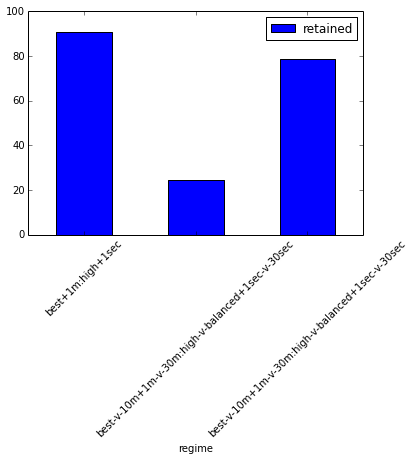

In [146]:
pd.DataFrame(retained_list, columns=["regime", "retained"]).plot(kind='bar', x="regime", rot=45)

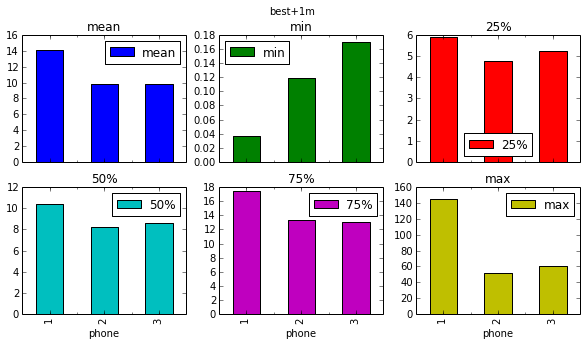

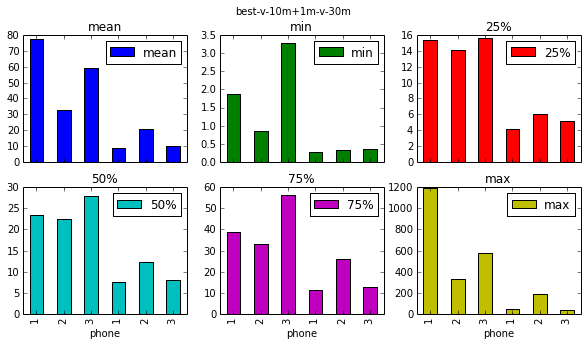

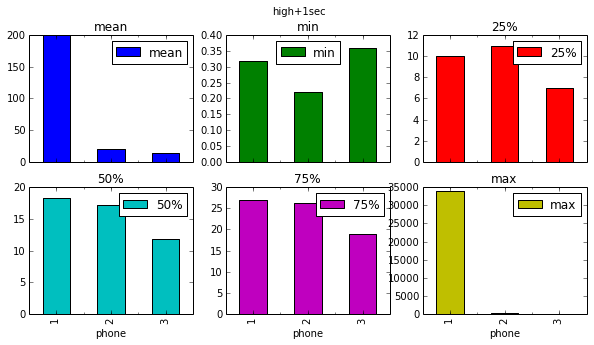

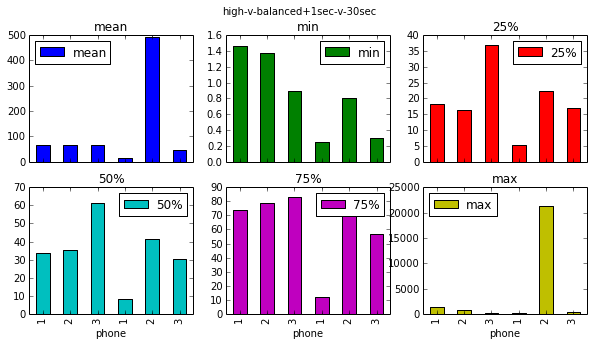

In [166]:
for key, df in pd.DataFrame(result_list).reset_index(drop=True).groupby('label'):
    df.drop(["count", "std"], axis=1, inplace=True)
    df.plot(subplots=True, x='phone', kind='bar', title=key, figsize=(10,5), layout = (2,3))